copied from info here


https://cookbooks.projectpythia.org/radar-cookbook/notebooks/foundations/pyart-gridding.html

In [ ]:
ls xprecip/gucxprecipradarS2.00.20221030.000005.raw.nc/ | grep 'PPI.nc' | grep '_2_'

: 

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)


import altair as alt
alt.data_transformers.disable_max_rows()

import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import act
import pyart

In [9]:
# Explore files
radar = pyart.io.read('gucxprecipradarS2.00.20221030.000005.raw.ncgucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000005.raw.csu.sail-20221030-000005_702875_22_326_RHI.nc')
print(radar.scan_type)

rhi


In [38]:
radar.elevation['data'].min(), radar.elevation['data'].max(),

(0.1538086, 19.940186)

In [16]:

fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)
radar.fields.keys()

dict_keys(['DBZ', 'VEL', 'WIDTH', 'ZDR', 'PHIDP', 'RHOHV', 'NCP', 'SNR', 'DBZhv'])

<Figure size 1000x1000 with 0 Axes>

In [17]:



z_grid_limits = (0,15000)
y_grid_limits = (-20_000.,20_000.)
x_grid_limits = (-20_000.,20_000.)
grid_resolution = 500

def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

30

/Users/elischwat/mambaforge/envs/arm/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


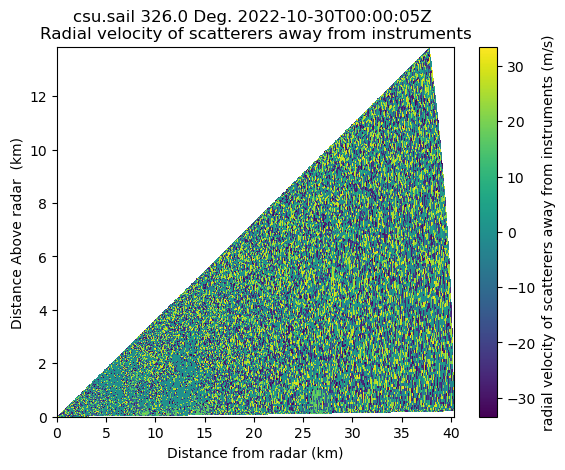

In [18]:
display.plot_rhi('VEL')

# PPI Scans


In [19]:
# Explore files
radar = pyart.io.read('xprecip/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000130.raw.csu.sail-20221030-000130_702887_22_1_PPI.nc')
print(radar.scan_type)

ppi


In [20]:

fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)
radar.fields.keys()

dict_keys(['DBZ', 'VEL', 'WIDTH', 'ZDR', 'PHIDP', 'RHOHV', 'NCP', 'SNR', 'DBZhv'])

<Figure size 1000x1000 with 0 Axes>

In [21]:



z_grid_limits = (0,15000)
y_grid_limits = (-20_000.,20_000.)
x_grid_limits = (-20_000.,20_000.)
grid_resolution = 500

def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

30

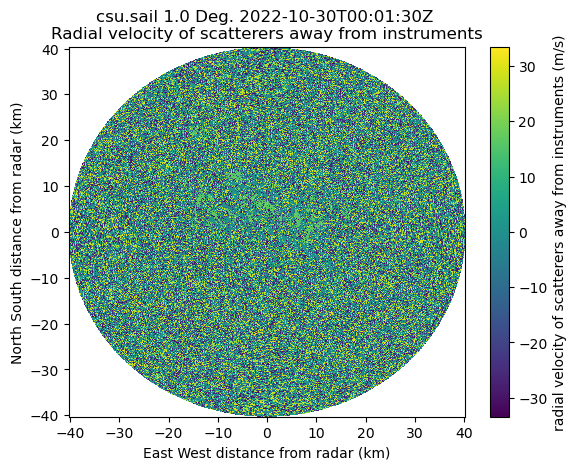

In [22]:
display.plot('VEL')